# ALL INFO FROM THIS WORKBOOK HAS BEEN MOVED TO THE MAIN WORKBOOK. PLEASE DO NOT WORK HERE.

In [179]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns
import cartopy.crs as ccrs
import geoviews as gv # noqa
import pyproj
import geopandas as gpd
import hvplot.pandas
import plotly.express as px

In [180]:
#Import vaccination data from google api
vac_df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/latest/vaccinations.csv')

In [181]:
#function formats the google dataframes - see below for input formats
def google_format(df,key,filt,length,columns,drop_values): #key, filt -> str; length -> int; columns, drop_values -> list
    df = df.dropna(subset=[key])
    df = df[df[key].str.contains(filt)]
    mask = (df[key].str.len() == length)
    df = df.loc[mask]
    df = df[columns]
    df = df[~df[key].isin(drop_values)]
    df.reset_index(drop = True, inplace = True)
    return df

In [182]:
#Input values for vaccination data
drop = ['US_AS','US_GU','US_MP','US_PR','US_VI']
cols = ['date','location_key','cumulative_persons_fully_vaccinated','new_persons_vaccinated','new_persons_fully_vaccinated']
loc_key = 'location_key'
contains = 'US_'

In [183]:
#formatting vaccination data
vac_df = google_format(vac_df, loc_key, contains, 5, cols, drop)

In [103]:
mylist = ['Orange','Apple'] #Keywords search
pattern = '|'.join(mylist)
vac_df.location_key.str.contains(pattern)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
Name: location_key, dtype: bool

In [184]:
#reading demographic data
dem_df = pd.read_csv('demographics.csv')

In [185]:
dem_df

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21684,ZA_WC_DC3,286786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21685,ZA_WC_DC4,611278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21686,ZA_WC_DC5,74247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21687,ZM,18383956.0,9103006.0,9280950.0,9989317.0,7871713.0,2646619.0,2646619.0,24.730,0.588,5663542.0,4550181.0,3180383.0,2185194.0,1413889.0,761259.0,403835.0,179965.0,45708.0


In [186]:
dcols = ['location_key','population']

In [187]:
#formatting demographic data
dem_df = google_format(dem_df, loc_key, contains, 5, dcols, drop)

In [188]:
#reading epidemeology data
epi_df = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/latest/epidemiology.csv')

In [189]:
ecols = ['location_key','cumulative_confirmed','cumulative_deceased','cumulative_recovered']

In [190]:
#formatting epidemeology data
epi_df = google_format(epi_df, loc_key, contains, 5, ecols, drop)

In [35]:
loc_key = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/location/US.csv')

In [60]:
AK_vac_df = US_vac_df[US_vac_df['location_key'].str.contains('US_AK')]

In [69]:
#Looking at only one state - this can be skipped
AK_total = AK_vac_df['cumulative_persons_fully_vaccinated'].iloc[1:len(AK_vac_df)].sum()
AK_total

451708.0

In [178]:
#we don't need this at the moment, can be skipped
def swap_rows(df, i1, i2): #Keep this!!!
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

In [191]:
#merging dataframes
total_df = vac_df.merge(dem_df, how = 'inner',on = 'location_key')

In [192]:

total_df['percent_fully_vaccinated'] = (total_df['cumulative_persons_fully_vaccinated']/total_df['population'])*100
total_df.sort_values('percent_fully_vaccinated', ascending = False)

,date,location_key,cumulative_persons_fully_vaccinated,new_persons_vaccinated,new_persons_fully_vaccinated,population,percent_fully_vaccinated
39,2022-09-15,US_RI,900147.0,0.0,0.0,1097379.0,82.026993
7,2022-09-15,US_DC,557746.0,0.0,0.0,689545.0,80.886092
46,2022-09-15,US_VT,517353.0,0.0,0.0,643077.0,80.449620
21,2022-09-15,US_ME,1092647.0,0.0,0.0,1362359.0,80.202575
6,2022-09-15,US_CT,2881218.0,0.0,0.0,3605944.0,79.901906
19,2022-09-15,US_MA,5573783.0,0.0,0.0,7029917.0,79.286612
11,2022-09-15,US_HI,1129082.0,0.0,0.0,1455271.0,77.585687
20,2022-09-15,US_MD,4677823.0,0.0,0.0,6177224.0,75.726945
34,2022-09-15,US_NY,15272806.0,0.0,0.0,20201249.0,75.603276
45,2022-09-15,US_VA,6372093.0,0.0,0.0,8631393.0,73.824619


In [193]:
#merging dataframes
total_df = total_df.merge(epi_df, how = 'inner',on = 'location_key')

In [194]:
total_df

,date,location_key,cumulative_persons_fully_vaccinated,new_persons_vaccinated,new_persons_fully_vaccinated,population,percent_fully_vaccinated,cumulative_confirmed,cumulative_deceased,cumulative_recovered
0,2022-09-15,US_AK,463635.0,0.0,0.0,733391.0,63.217983,302448.0,1321.0,7165.0
1,2022-09-15,US_AL,2558655.0,0.0,0.0,5024279.0,50.925814,1511092.0,20321.0,295690.0
2,2022-09-15,US_AR,1678989.0,0.0,0.0,3011524.0,55.752137,943944.0,11970.0,315517.0
3,2022-09-15,US_AZ,4597005.0,0.0,0.0,7151502.0,64.280273,2264159.0,31244.0,NaN
4,2022-09-15,US_CA,29060326.0,0.0,0.0,39538223.0,73.499322,11171759.0,95620.0,NaN
5,2022-09-15,US_CO,4125180.0,0.0,0.0,5773714.0,71.447599,1649212.0,13426.0,NaN
6,2022-09-15,US_CT,2881218.0,0.0,0.0,3605944.0,79.901906,885767.0,11317.0,9800.0
7,2022-09-15,US_DC,557746.0,0.0,0.0,689545.0,80.886092,103487.0,1382.0,34985.0
8,2022-09-15,US_DE,690769.0,0.0,0.0,989948.0,69.778312,305284.0,3080.0,18851.0
9,2022-09-15,US_FL,14648767.0,0.0,0.0,21538187.0,68.012999,7082717.0,80647.0,NaN


In [195]:
total_df['percent_death_rate_by_case'] = (total_df['cumulative_deceased']/total_df['cumulative_confirmed'])*100

In [196]:
total_df['percent_death_rate_per_capita'] = (total_df['cumulative_deceased']/total_df['population'])*100

In [197]:
total_df['percent_confirmed'] = (total_df['cumulative_confirmed']/total_df['population'])*100

In [198]:
total_df['state_code'] = total_df.location_key.str.replace('US_','') #adding the state code for the plotly function

In [199]:
total_df.sort_values('percent_fully_vaccinated', ascending = False)

,date,location_key,cumulative_persons_fully_vaccinated,new_persons_vaccinated,new_persons_fully_vaccinated,population,percent_fully_vaccinated,cumulative_confirmed,cumulative_deceased,cumulative_recovered,percent_death_rate_by_case,percent_death_rate_per_capita,percent_confirmed,state_code
39,2022-09-15,US_RI,900147.0,0.0,0.0,1097379.0,82.026993,420175.0,3652.0,NaN,0.869162,0.332793,38.288959,RI
7,2022-09-15,US_DC,557746.0,0.0,0.0,689545.0,80.886092,103487.0,1382.0,34985.0,1.335433,0.200422,15.008013,DC
46,2022-09-15,US_VT,517353.0,0.0,0.0,643077.0,80.449620,141282.0,715.0,13384.0,0.506080,0.111184,21.969686,VT
21,2022-09-15,US_ME,1092647.0,0.0,0.0,1362359.0,80.202575,285670.0,2561.0,12840.0,0.896489,0.187983,20.968775,ME
6,2022-09-15,US_CT,2881218.0,0.0,0.0,3605944.0,79.901906,885767.0,11317.0,9800.0,1.277650,0.313843,24.564081,CT
19,2022-09-15,US_MA,5573783.0,0.0,0.0,7029917.0,79.286612,2021331.0,21536.0,508745.0,1.065437,0.306348,28.753270,MA
11,2022-09-15,US_HI,1129082.0,0.0,0.0,1455271.0,77.585687,333547.0,1662.0,11958.0,0.498281,0.114206,22.919924,HI
20,2022-09-15,US_MD,4677823.0,0.0,0.0,6177224.0,75.726945,1236570.0,15285.0,9703.0,1.236080,0.247441,20.018215,MD
34,2022-09-15,US_NY,15272806.0,0.0,0.0,20201249.0,75.603276,6031598.0,70733.0,NaN,1.172707,0.350142,29.857550,NY
45,2022-09-15,US_VA,6372093.0,0.0,0.0,8631393.0,73.824619,2066675.0,21646.0,NaN,1.047383,0.250782,23.943702,VA


In [41]:
#function for regression plots
def reg(df,x,y,x_text,y_text):    
    lm = st.linregress(x = df[x], y = df[y])
    data_fit = lm[0]*df[x] + lm[1]
    fit_df = pd.DataFrame({'x': df[x], 'fitted': data_fit})
    ax = sns.scatterplot(data = df, x = x, y = y)
    #ax = df.plot.scatter(y = y, x = x, s = 30)
    print(f"The r-value is: {lm[2]}")
    fit_df.plot.line(x = 'x', y = 'fitted', color = 'red', ax=ax, legend = None, xlabel = x)
    plt.text(x_text,y_text,f"y = {'%.2f' %lm[0]}x + {'%.1f' %lm[1]}", color = 'red', fontsize = 16)

The r-value is: -0.3365701397470186


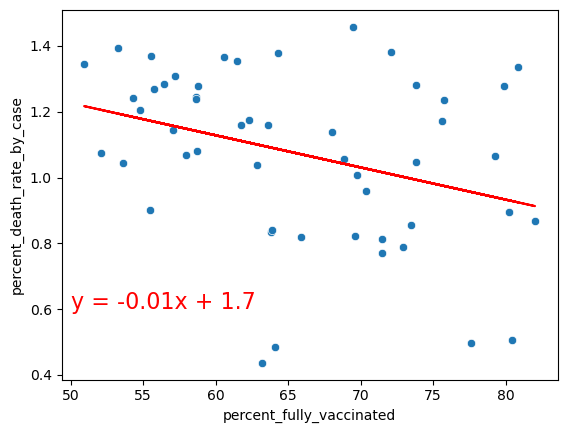

In [82]:
reg(total_df,'percent_fully_vaccinated','percent_death_rate_by_case',50,0.6)

The r-value is: -0.5461008665715601


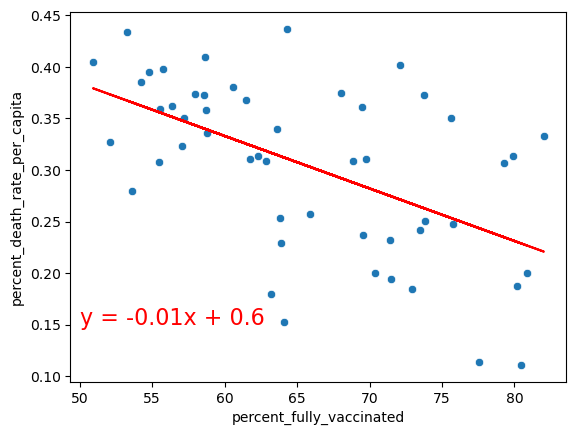

In [83]:
reg(total_df,'percent_fully_vaccinated','percent_death_rate_per_capita',50,0.15)

The r-value is: -0.4309090645796947


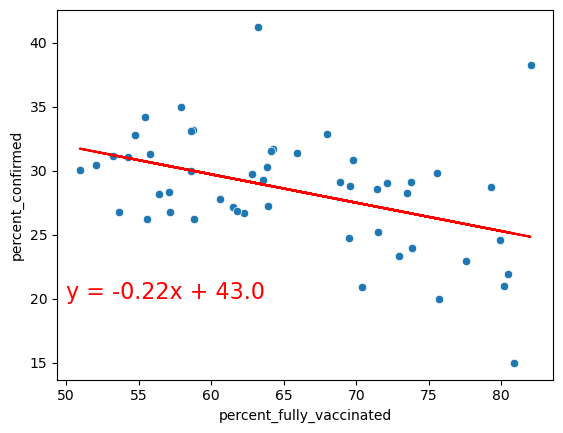

In [142]:
reg(total_df,'percent_fully_vaccinated','percent_confirmed',50,20)

In [155]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.hvplot(c='country', geo=True)

C:\Users\gmich\AppData\Local\Temp\ipykernel_2492\3765853907.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


:Polygons   [Longitude,Latitude]

In [211]:
#generating map of us states - you need to specify the color variable as one of the dataframe columns 
fig = px.choropleth(total_df,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='percent_death_rate_per_capita',
                    color_continuous_scale="blues" 
                    )
# fig.add_scattergeo(
#     locations=total_df['state_code'],
#     locationmode="USA-states", 
#     text=total_df['state_code'],
#     mode='text',
# )
fig.show()